## Spam detection Project

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

### 1. Data Cleaning
### 2. EDA
### 3. Text Preprocessing : Vectorisatoin , stemming etc.
### 4. Model Building
### 5. Evavulation of MOdel 
### 6. Improvement
### 7. Website
### 8. Deployment

#### 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop the last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.sample(5)

,v1,v2
1058,ham,Tell me they're female :V how're you throwing ...
4977,ham,JADE ITS PAUL. Y DIDNåÕT U TXT ME? DO U REMEMB...
3855,ham,I'm ok. Will do my part tomorrow
1161,ham,K. I will sent it again
393,ham,Yes i think so. I am in office but my lap is i...


In [7]:
## renaming the columns

df.rename(columns={'v1' : 'target', 'v2': 'text'}, inplace=True)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# enable label encoader for target

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
## missing values

df.isna().sum()

target    0
text      0
dtype: int64

In [12]:
## check for the duplicate values

df.duplicated().sum()

403

In [13]:
## remove the duplicate
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

#### 2. EDA

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

- Most of the data points are ham and very less are spam
- Data is imbalance

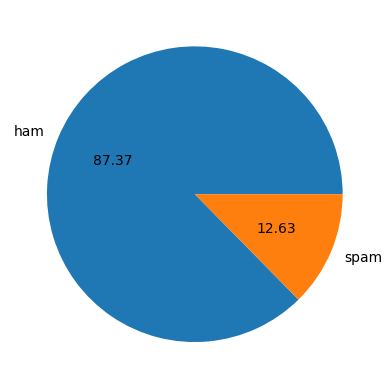

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f');

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# we create  new feartures as number of char in the sms, no of words in a sms, number of sentences in the sms

In [18]:
# to get the number of character in an sms

df['num_char']= df['text'].apply(len)

C:\Users\malvi\AppData\Local\Temp\ipykernel_15460\38278338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']= df['text'].apply(len)


In [19]:
# number of words in an sms

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\malvi\AppData\Local\Temp\ipykernel_15460\4210787333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [20]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
## number of sentences

df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\malvi\AppData\Local\Temp\ipykernel_15460\2926679519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [22]:
df.head()

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# ham messages

df[df['target'] == 0][['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# Spam messages

df[df['target'] == 1][['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
## now plot a histogram for both the category

import seaborn as sns


<Axes: xlabel='num_char', ylabel='Count'>

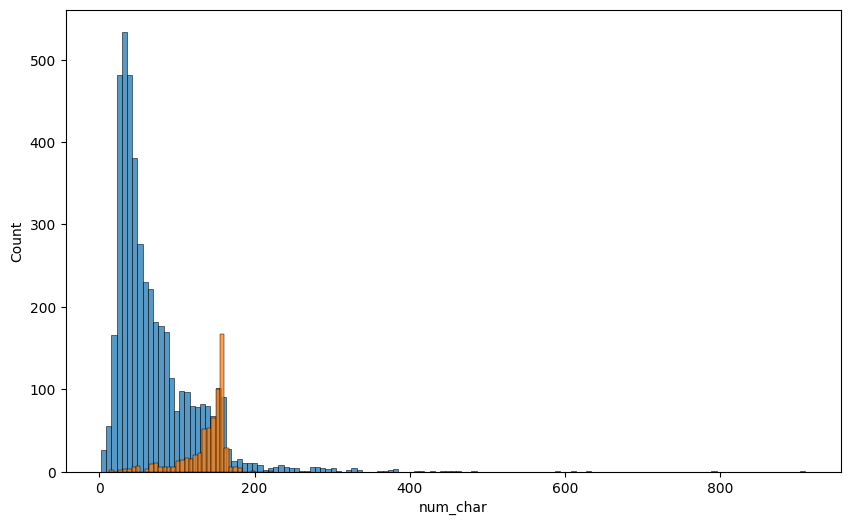

In [27]:
plt.figure(figsize=(10, 6))

sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] ==1]['num_char'])

<Axes: xlabel='num_words', ylabel='Count'>

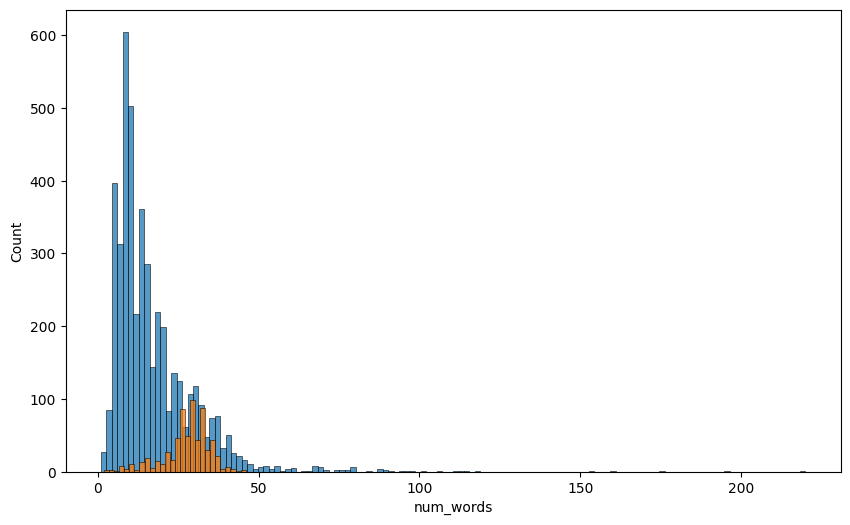

In [28]:
plt.figure(figsize=(10, 6))

sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'])

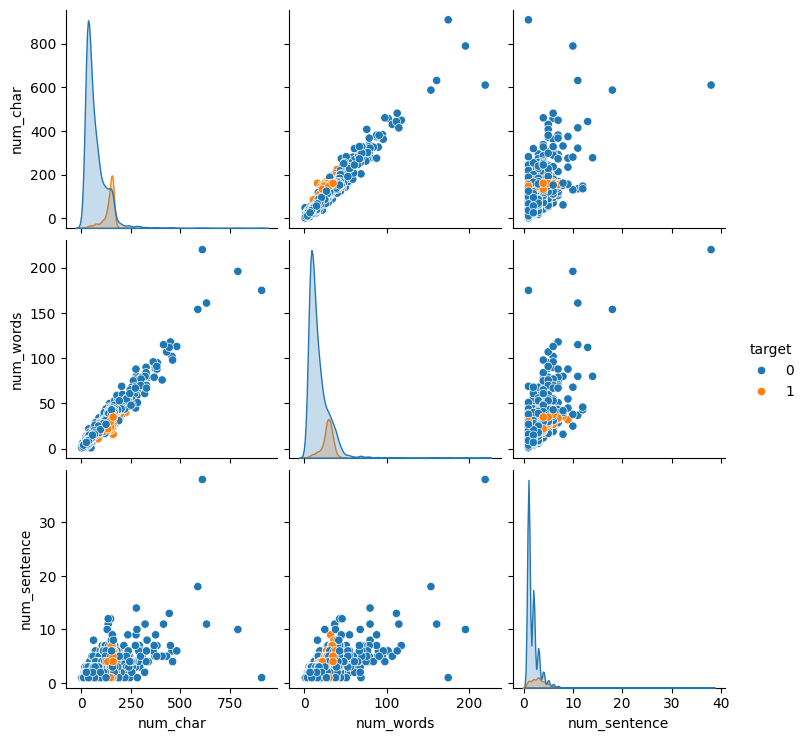

In [29]:
sns.pairplot(df, hue= 'target')

there are lot's of outliers in the dataset

<Axes: >

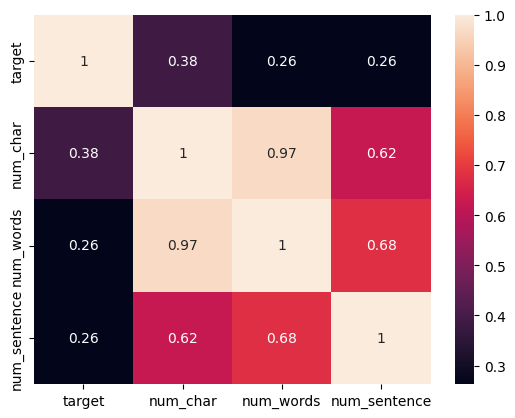

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

#### 3. Text/Data Preprocessing

- Lower case
- Tokenisation
- Removing Special characters
- Removing Stopwords & Puncuatation 
- Stemming

In [31]:
# funtion for preprocessing
def transform_text(text):
    text = text.lower()
    return text

In [32]:
transform_text("Hi How are YOu Doing Kuldeep")

'hi how are you doing kuldeep'

In [33]:
# tokenisatoin 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text
transform_text("Hi How are YOu Doing Kuldeep")

['hi', 'how', 'are', 'you', 'doing', 'kuldeep']

In [34]:
# removing special characters 

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    return y
            


In [35]:
transform_text(" how Are you %32% eg")

['how', 'are', 'you', '32', 'eg']

In [36]:
# removing stopwords and puncuataion 
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
# puncuatation 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [39]:
print(transform_text('Hi! how are you kuldeep  ? '))
print(transform_text("Did you like my ppt on ML"))

['hi', 'kuldeep']
['like', 'ppt', 'ml']


In [40]:
## stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [41]:
ps.stem('loving')

'love'

In [42]:
# stemming and apply all the steps

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

           
            
    return " ".join(y)

In [43]:
transform_text('I loved the youtube lectures on the machine learning & how about you' )

'love youtub lectur machin learn'

In [44]:
## Data preprocessing

print(df['text'][0])
transform_text(df['text'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [45]:
df['transformed_test'] = df['text'].apply(transform_text)

C:\Users\malvi\AppData\Local\Temp\ipykernel_15460\3438036529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_test'] = df['text'].apply(transform_text)


In [46]:
df.head()

,target,text,num_char,num_words,num_sentence,transformed_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
pip install wordcloud

  Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\malvi\anaconda3\envs\pythonenv\lib\site-packages\mlproject-0.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [50]:
# world cloud generate of spam messages and ham to find which is the most frequent words comes in that

from  wordcloud import WordCloud

wc = WordCloud(width=500, height= 500, min_font_size=10, background_color='white')

In [51]:
spam_wc = wc.generate(df[df['target']==1] ['transformed_test'].str.cat(sep= " "))

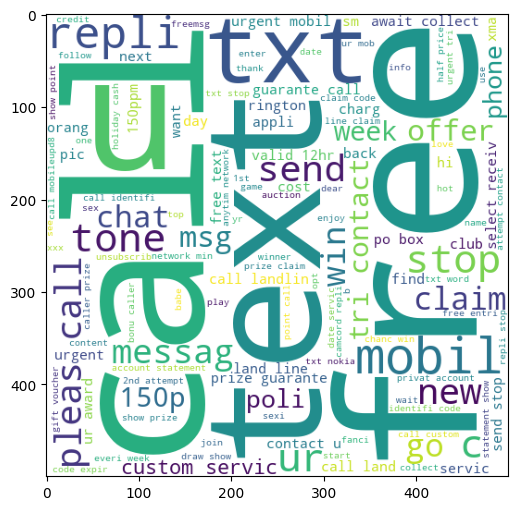

In [52]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

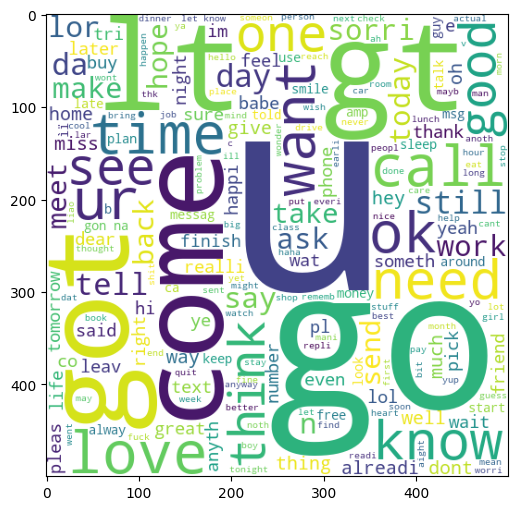

In [53]:
# ham messages 

ham_wc = wc.generate(df[df['target']==0] ['transformed_test'].str.cat(sep= " "))
plt.figure(figsize= (15, 6))
plt.imshow(ham_wc)

In [54]:
df.rename(columns={'transformed_test':'transformed_text'}, inplace=True)
df.head()

C:\Users\malvi\AppData\Local\Temp\ipykernel_15460\2975013712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'transformed_test':'transformed_text'}, inplace=True)


,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
## top 30 words of each categories of Spam
spam_corpus = []
for message in df[df['target']==1]['transformed_text'].tolist():

    # seperate all the words
    for word in message.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [58]:
## top 30 words of each categories of Ham 
ham_corpus = []
for message in df[df['target']==0]['transformed_text'].tolist():

    # seperate all the words
    for word in message.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35404

In [60]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

#### 4. Model Building

In [61]:
## NaiveByes : it works best on textual data

In [62]:
df.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
## we need to convert text into vector or vectorisations
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# tf = TfidfTransformer()
cv= CountVectorizer()

In [64]:
x = cv.fit_transform(df['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
y = df['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=(19))

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8713733075435203
[[791 115]
 [ 18 110]]
0.4888888888888889


In [71]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9777562862669246
[[892  14]
 [  9 119]]
0.8947368421052632


In [72]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9748549323017408
[[905   1]
 [ 25 103]]
0.9903846153846154


In [73]:
## since the best model is CounteVEctorisation with Bnb ( bernoulli )

In [74]:
# using the Tfidf techniques

In [75]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer()
x1 = tfidf.fit_transform(df['transformed_text']).toarray()
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
y1 = df['target'].values
y1

array([0, 0, 1, ..., 0, 0, 0])

In [77]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=(23))

In [79]:
mnb.fit(x1_train, y1_train)
y1_pred2 = mnb.predict(x1_test)

print(accuracy_score(y1_test, y1_pred2))
print(confusion_matrix(y1_test, y1_pred2))
print(precision_score(y1_test, y1_pred2))

0.965183752417795
[[916   0]
 [ 36  82]]
1.0


### Since the more focus over here is at the precision score in spam & ham we will take the model of Multinominal Naive Byes with the TFIDF technique

##### Let's try with some others model

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [177]:
svc= SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [179]:
clfs = {
    'SVC' : svc, 
    'KN': knc, 
    'NB' : mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc,
    'BgC': bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [181]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision= precision_score(y_test, y_pred)

    return accuracy, precision

In [185]:
train_classifier(svc, x1_train, y1_train, x1_test, y1_test)

(0.9729206963249516, 0.9591836734693877)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, x1_train, y1_train, x1_test, y1_test)

    print("For ", name)
    print("Accuracy ", current_accuracy)
    print("Precision ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy  0.9729206963249516
Precision  0.9591836734693877
For  KN
Accuracy  0.9100580270793037
Precision  1.0
For  NB
Accuracy  0.965183752417795
Precision  1.0
For  DT
Accuracy  0.9390715667311412
Precision  0.7570093457943925
For  LR
Accuracy  0.9545454545454546
Precision  0.8901098901098901
For  RF
Accuracy  0.9777562862669246
Precision  1.0


C:\Users\malvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  Adaboost
Accuracy  0.9671179883945842
Precision  0.8962264150943396


In [ ]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 
                               'Accuracy':accuracy_scores,
                               'Precision': precision_scores})

In [ ]:
performance_df

## Using the new test


- Step 1 . Is to transofrm the input
- Srep 2. Apply the Vectorisation (TFIDF)
- step 3. Apply the Algorithm

In [80]:
import pickle
pickle.dump(tfidf, open('vectorizer1.pkl', 'wb'))
pickle.dump(mnb, open('model1.pkl', 'wb'))